# Regression modeling

## 1. Linear Regression

In [1]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [2]:
DPP_DTT_df = pd.read_csv("combined_df_DPP_DTT_step.csv")
DPP_DTT_df

,solution_concentration,polymer_mw,polymer_mn,polymer_dispersity,hole_mobility,solution_treatment,substrate_pretreatment,post_process,channel_width,channel_length,dielectric_thickness,film_deposition_type_drop,film_deposition_type_spin,dielectric_material_SiO2,electrode_configuration_BGBC,electrode_configuration_BGTC,electrode_configuration_TGBC,gate_material_Other,film_deposition_type_MGC,dielectric_material_other,solvent_boiling_point,blend_conjugated_polymer,insulating_polymer,treatment_type_sam,treatment_type_plasma,treatment_type_uv_ozone,solution_treatment_poor_solvent,solution_treatment_aging,solution_treatment_sonication,solution_treatment_mixing,solution_treatment_uv_irradiation
0,4.00,299.00,90.000,3.32,0.110000,0,0,1,1500,80,300,0,1,1,0,1,0,0,0,0,132.0,0,0,0,0,0,0,0,0,0,0
1,4.00,299.00,90.000,3.32,0.290000,0,1,1,1500,80,300,0,1,1,0,1,0,0,0,0,132.0,0,0,1,0,0,0,0,0,0,0
2,4.00,299.00,90.000,3.32,0.230000,0,1,1,1500,80,300,0,1,1,0,1,0,0,0,0,132.0,0,0,1,0,0,0,0,0,0,0
3,4.00,299.00,90.000,3.32,0.730000,0,1,1,1500,80,300,0,1,1,0,1,0,0,0,0,132.0,0,0,1,0,0,0,0,0,0,0
4,4.00,299.00,90.000,3.32,1.860000,0,1,1,1500,80,300,0,1,1,0,1,0,0,0,0,132.0,0,0,1,0,0,0,0,0,0,0
5,4.00,299.00,90.000,3.32,0.210000,0,1,1,1500,80,300,0,1,1,0,1,0,0,0,0,132.0,0,0,1,0,0,0,0,0,0,0
6,4.00,299.00,90.000,3.32,0.340000,0,1,1,1500,80,300,0,1,1,0,1,0,0,0,0,132.0,0,0,1,0,0,0,0,0,0,0
7,4.00,299.00,90.000,3.32,0.240000,0,1,1,1500,80,300,0,1,1,0,1,0,0,0,0,132.0,0,0,1,0,0,0,0,0,0,0
8,4.00,299.00,90.000,3.32,1.970000,0,1,1,1500,80,300,0,1,1,0,1,0,0,0,0,132.0,0,0,1,0,0,0,0,0,0,0
9,4.00,299.00,90.000,3.32,0.690000,0,1,1,1500,80,300,0,1,1,0,1,0,0,0,0,132.0,0,0,1,0,0,0,0,0,0,0


In [3]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_mn',
 'polymer_dispersity',
 'hole_mobility',
 'solution_treatment',
 'substrate_pretreatment',
 'post_process',
 'channel_width',
 'channel_length',
 'dielectric_thickness',
 'film_deposition_type_drop',
 'film_deposition_type_spin',
 'dielectric_material_SiO2',
 'electrode_configuration_BGBC',
 'electrode_configuration_BGTC',
 'electrode_configuration_TGBC',
 'gate_material_Other',
 'film_deposition_type_MGC',
 'dielectric_material_other',
 'solvent_boiling_point',
 'blend_conjugated_polymer',
 'insulating_polymer',
 'treatment_type_sam',
 'treatment_type_plasma',
 'treatment_type_uv_ozone',
 'solution_treatment_poor_solvent',
 'solution_treatment_aging',
 'solution_treatment_sonication',
 'solution_treatment_mixing',
 'solution_treatment_uv_irradiation']

In [4]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)
DPPPDTT_X = DPP_DTT_df.drop(labels = 'polymer_dispersity', axis = 1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.671
R² score for test set: -0.491


## Polynomial regression

Degree 1: R² train = 0.671, R² test = -0.491
Degree 2: R² train = 0.846, R² test = -9498.172
Degree 3: R² train = 0.846, R² test = -95234.939
Degree 4: R² train = 0.846, R² test = -5307007017.170
Degree 5: R² train = 0.846, R² test = -615791415717.297
Degree 6: R² train = 0.846, R² test = -7937912377129.866


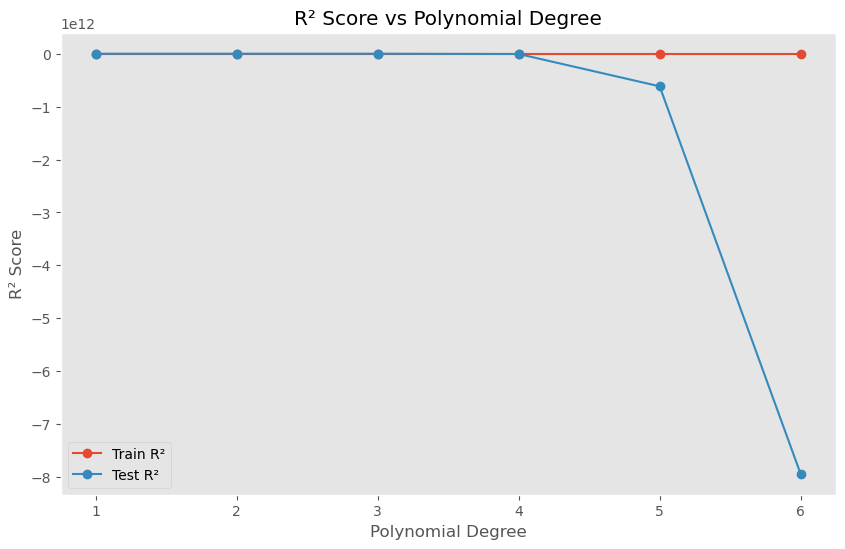

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()


## Ridge regression

Alpha 0.1: R² train = 0.669, R² test = -0.506
Alpha 0.2: R² train = 0.666, R² test = -0.480
Alpha 0.3: R² train = 0.663, R² test = -0.446
Alpha 0.4: R² train = 0.661, R² test = -0.413
Alpha 0.5: R² train = 0.659, R² test = -0.383
Alpha 0.6: R² train = 0.658, R² test = -0.355
Alpha 0.7: R² train = 0.656, R² test = -0.331
Alpha 0.8: R² train = 0.655, R² test = -0.309
Alpha 0.9: R² train = 0.654, R² test = -0.289
Alpha 1.0: R² train = 0.653, R² test = -0.270


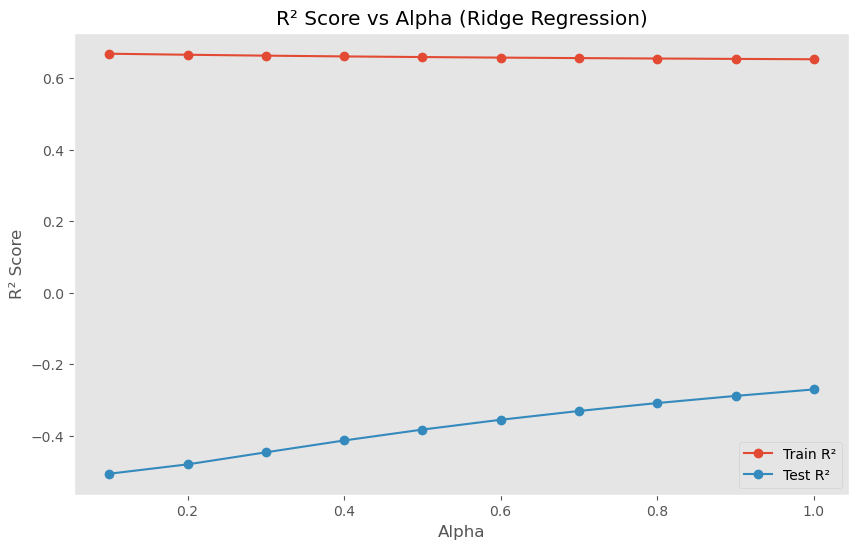

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()


## Lasso regression

Alpha 0.1: R² train = 0.579, R² test = 0.151
Alpha 0.2: R² train = 0.556, R² test = 0.159
Alpha 0.3: R² train = 0.556, R² test = 0.162
Alpha 0.4: R² train = 0.555, R² test = 0.163
Alpha 0.5: R² train = 0.555, R² test = 0.165
Alpha 0.6: R² train = 0.555, R² test = 0.166
Alpha 0.7: R² train = 0.555, R² test = 0.168
Alpha 0.8: R² train = 0.554, R² test = 0.169
Alpha 0.9: R² train = 0.554, R² test = 0.170
Alpha 1.0: R² train = 0.554, R² test = 0.171


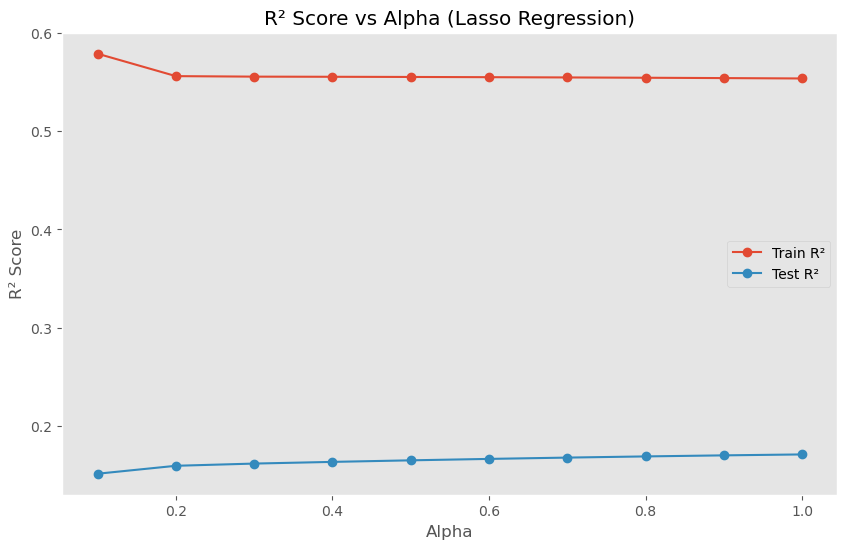

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()


## Elsaticnet regression

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.622007  0.140973
1     0.1       0.2  0.616802  0.174972
2     0.1       0.3  0.612142  0.195282
3     0.1       0.4  0.607487  0.196575
4     0.1       0.5  0.603178  0.196519
5     0.1       0.6  0.599238  0.187769
6     0.1       0.7  0.594316  0.177315
7     0.1       0.8  0.588269  0.163689
8     0.1       0.9  0.581610  0.149350
9     0.1       1.0  0.578965  0.151187
10    0.2       0.1  0.605868  0.192069
11    0.2       0.2  0.596747  0.205189
12    0.2       0.3  0.588516  0.187366
13    0.2       0.4  0.579591  0.166122
14    0.2       0.5  0.571832  0.156996
15    0.2       0.6  0.566834  0.158286
16    0.2       0.7  0.560702  0.158677
17    0.2       0.8  0.556385  0.158171
18    0.2       0.9  0.556267  0.158729
19    0.2       1.0  0.556136  0.159272
20    0.3       0.1  0.594777  0.199673
21    0.3       0.2  0.582956  0.188340
22    0.3       0.3  0.571179  0.160464
23    0.3       0.4  0.564011  0.158481


## Support Vector Regression (SVR)

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train)  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)

# Visualize R² scores as heatmaps
# Pivot data for heatmaps
train_heatmap = results_df.pivot("C", "epsilon", "r2_train")
test_heatmap = results_df.pivot("C", "epsilon", "r2_test")

# Plot train heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Train R² Heatmap")
plt.xlabel("Epsilon")
plt.ylabel("C")
plt.show()

# Plot test heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(test_heatmap, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Test R² Heatmap")
plt.xlabel("Epsilon")
plt.ylabel("C")
plt.show()


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

    C  epsilon  r2_train   r2_test
0   1      0.1 -0.097299 -0.079506
1   1      0.2 -0.075163 -0.044983
2   1      0.3 -0.047537 -0.015564
3   1      0.4 -0.029330 -0.001577
4   1      0.5 -0.008877  0.014972
5   1      0.6  0.006557  0.015781
6   1      0.7  0.018053  0.005594
7   1      0.8  0.024758 -0.011778
8   1      0.9  0.025128 -0.042002
9   1      1.0  0.019263 -0.087886
10  1      1.1  0.009112 -0.145245
11  2      0.1 -0.073249 -0.065300
12  2      0.2 -0.051660 -0.028584
13  2      0.3 -0.025474 -0.007091
14  2      0.4 -0.000757  0.013990
15  2      0.5  0.015414  0.024633
16  2      0.6  0.027113  0.021170
17  2      0.7  0.037772  0.008981
18  2      0.8  0.043643 -0.010552
19  2      0.9  0.040793 -0.045512
20  2      1.0  0.033196 -0.090087
21  2      1.1  0.022755 -0.148092
22  3      0.1 -0.061458 -0.065206
23  3      0.2 -0.035156 -0.023441
24  3      0.3 -0.006082  0.004394
25  3      0.4  0.013919  0.021827
26  3      0.5  0.034097  0.034491
27  3      0.6  0.04

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

## Decision tree regression

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.847
R² score for test set: 0.377


## Random forest regression

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

y_train = y_train.values
y_test = y_test.values

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
25           350  0.839756  0.443665
26           360  0.839700  0.440086
24           340  0.839665  0.436561
27           370  0.839800  0.435500
28           380  0.839652  0.435227
20           300  0.839743  0.435214
21           310  0.839477  0.435016
30           400  0.839743  0.434847
29           390  0.839592  0.432108
0            100  0.839174  0.431946


## Gradient bossting regression

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 16)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
25           350  0.839756  0.443665
26           360  0.839700  0.440086
24           340  0.839665  0.436561
27           370  0.839800  0.435500
28           380  0.839652  0.435227
20           300  0.839743  0.435214
21           310  0.839477  0.435016
30           400  0.839743  0.434847
29           390  0.839592  0.432108
0            100  0.839174  0.431946


## K-nearest Neighbors Regression

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
10           11  0.575551  0.407396
9            10  0.605002  0.406530
11           12  0.532606  0.389889
8             9  0.640321  0.381337
13           14  0.459734  0.351476
12           13  0.481907  0.347521
7             8  0.680681  0.327237
14           15  0.413734  0.311800
15           16  0.372133  0.271497
6             7  0.708784  0.269961


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Train k-NN model
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)

# Evaluate baseline performance
baseline_r2 = r2_score(Y_test, knn.predict(X_test))

# Compute permutation importance
perm_importance = permutation_importance(knn, X_test, Y_test, n_repeats=30, random_state=42)

# Display importance scores
importance_df = pd.DataFrame({
    'feature': DPP_DTT_X.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)

print(importance_df)

NameError: name 'Y_test' is not defined

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


In [ ]:
!pip install catboost

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
iterations_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
depth_range = range(1, 17)

# Perform grid search over hyperparameters
for iterations in iterations_range:
    for learning_rate in learning_rate_range:
        for depth in depth_range:
            # Train CatBoost Regressor
            model = CatBoostRegressor(
                iterations=iterations,
                learning_rate=learning_rate,
                depth=depth,
                verbose=0,  # Suppress CatBoost output
                random_seed=42
            )
            model.fit(X_train, y_train.ravel())  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'iterations': iterations,
                'learning_rate': learning_rate,
                'depth': depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
            model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
            # Train the model
            model.fit(X_train, y_train.ravel())
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
3519           310            1.0         16  0.819088  0.702179
632            130            1.0          9  0.819088  0.702179
626            130            1.0          3  0.819088  0.702179
627            130            1.0          4  0.819088  0.702179
628            130            1.0          5  0.819088  0.702179
629            130            1.0          6  0.819088  0.702179
630            130            1.0          7  0.819088  0.702179
631            130            1.0          8  0.819088  0.702179
633            130            1.0         10  0.819088  0.702179
624            130            1.0          1  0.819088  0.702179


## Neural network regression

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

hidden_layer_sizes_range = range(50, 440, 10)

mse_scores = []
r2_scores = []

for size in hidden_layer_sizes_range:
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', solver='adam', max_iter=1000, random_state=42)
    mlp_regressor.fit(X_train_scaled, Y_train)
    Y_pred = mlp_regressor.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hidden_layer_sizes_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('Hidden Layer Size vs MSE')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(hidden_layer_sizes_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('Hidden Layer Size vs R^2 Score')
plt.xlabel('Hidden Layer Size')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(r2_scores)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

# Define a range of `n_estimators` to evaluate
n_estimators_range = np.arange(1, 101, 1)

# Initialize a list to store the R2 scores for each model
r2_scores = []

# Evaluate Extra Trees model with different `n_estimators`
for n_estimators in n_estimators_range:
    model = ExtraTreesRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(Y_test, predictions)
    r2_scores.append(r2)

# Plotting n_estimators vs R2
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r2_scores, marker='o', linestyle='-')
plt.title('Effect of n_estimators on R2 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()